In [32]:
import os
dirpath = os.getcwd()
path=dirpath + '/img-060705-17.10.14-p-018t000.jpg'

'''from IPython.display import display
from PIL import Image

display(Image.open(path))


from PIL import Image
im = Image.fromarray(image)
im.save("your_file.jpeg")
'''
import numpy as np
import matplotlib.pyplot as plt
import cv2

import os
os.listdir()

def focus_gen():
    return none

def map_disp(mapmat):
    # Scales to visualizable CVS
    return none

class Scene:
    # Class stores image pixels paired with depth values of ambiguous scale.
    def __init__(self, img, mapmat):
        self.chans = (img, __improve(mapmat))
        return self
    
    def __improve(mapmat):
    # Requires subclass implementation per dataset, result should be double distance values from 0 to 1
        return mapmat

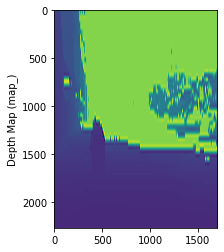

In [33]:
from scipy.io import loadmat
x = loadmat(dirpath + '/depth_sph_corr-060705-17.10.14-p-018t000.mat')
positions = x['Position3DGrid']

(mapH, mapW, x) = positions.shape
result = np.zeros((mapH,mapW))
for i in range(0, mapH):
    for j in range(0, mapW):
        result[i][j] = positions[i][j][3]

img = cv2.imread(path)
map_ = cv2.resize(result, dsize=(img.shape[1], img.shape[0]), interpolation=cv2.INTER_CUBIC)
plt.imshow(map_)
cv2.normalize(map_,map_,0,1,cv2.NORM_MINMAX)
plt.ylabel('Depth Map (map_)')
plt.show()

In [55]:
def make_disc_kernel(radius):
    '''
    Function produces a flat disc filter,
    Meant to mimic camera Bokeh
    '''
    x = np.arange(-radius, radius - 1)
    y = np.arange(-radius, radius - 1)
    xx, yy = np.meshgrid(x, y, sparse=True)
    disc = np.ones((radius*2-1,radius*2-1))
    disc[(xx+1)**2+(yy+1)**2 >= (1.0*radius)**2] = 0
    return disc/np.sum(disc)

max_kernel = 10
thresh = 0
kernel_shrink = max_kernel - 1
layer_old = np.zeros(img.shape)
while (kernel_shrink > 1):
    threshold_indices = map_ < thresh
    layer = np.copy(img/255.0)
    layer[threshold_indices] = 0
    thresh += 1.0/max_kernel
    bokeh_kernel = make_disc_kernel(max_kernel - kernel_shrink)
    kernel_shrink -= 1
    mask = layer == 0
    layer = cv2.filter2D(img, 8, bokeh_kernel)/255.0
    gamma_layer = cv2.filter2D((img_gamma, 8, bokeh_kernel)
    layer[gamma_layer > layer] = gamma_layer[gamma_layer > layer]
    layer[np.nonzero(mask)] = layer_old[np.nonzero(mask)]
    layer_old = np.copy(layer)

plt.imshow(layer)
plt.ylabel('Depth Blur Result')
plt.show()

from PIL import Image
im = Image.fromarray(layer)
im.save("your_file.jpeg")

SyntaxError: invalid syntax (<ipython-input-55-c8a67c8031c7>, line 27)

In [56]:
img.dtype

dtype('uint8')